In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [23]:
# Cargar el dataset procesado
data = pd.read_csv('data_evaluacion_processed.csv')

In [25]:
# Separar características y etiqueta
X = data.drop('salary', axis=1)
y = data['salary']

In [27]:
# Dividir el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# Normalizar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [31]:
# Entrenar y evaluar el modelo de Árbol de Decisión
dtree = DecisionTreeClassifier()
dtree.fit(X_train_scaled, y_train)
y_pred_dtree = dtree.predict(X_test_scaled)

In [33]:
# Evaluación del modelo
print('\nDecision Tree')
print('Train Accuracy : %.5f' % dtree.score(X_train_scaled, y_train))
print('Test Accuracy : %.5f' % dtree.score(X_test_scaled, y_test))
print("Precisión del modelo:", accuracy_score(y_test, y_pred_dtree))


Decision Tree
Train Accuracy : 0.99992
Test Accuracy : 0.80929
Precisión del modelo: 0.8092947077490019


In [35]:
# Calcular y mostrar la matriz de confusión
cm = confusion_matrix(y_test, y_pred_dtree)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Clase 0', 'Clase 1'])

<Figure size 800x600 with 0 Axes>

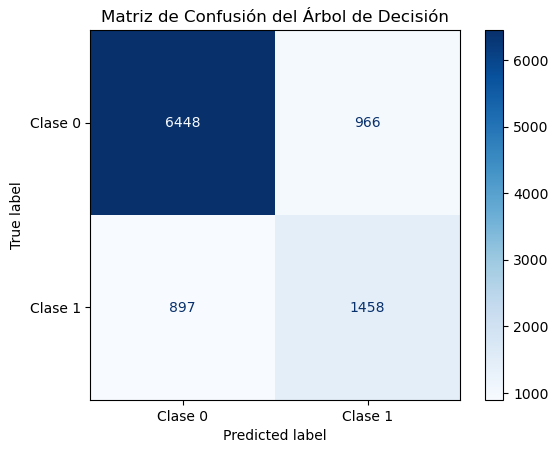

In [37]:
# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Matriz de Confusión del Árbol de Decisión')
plt.show()

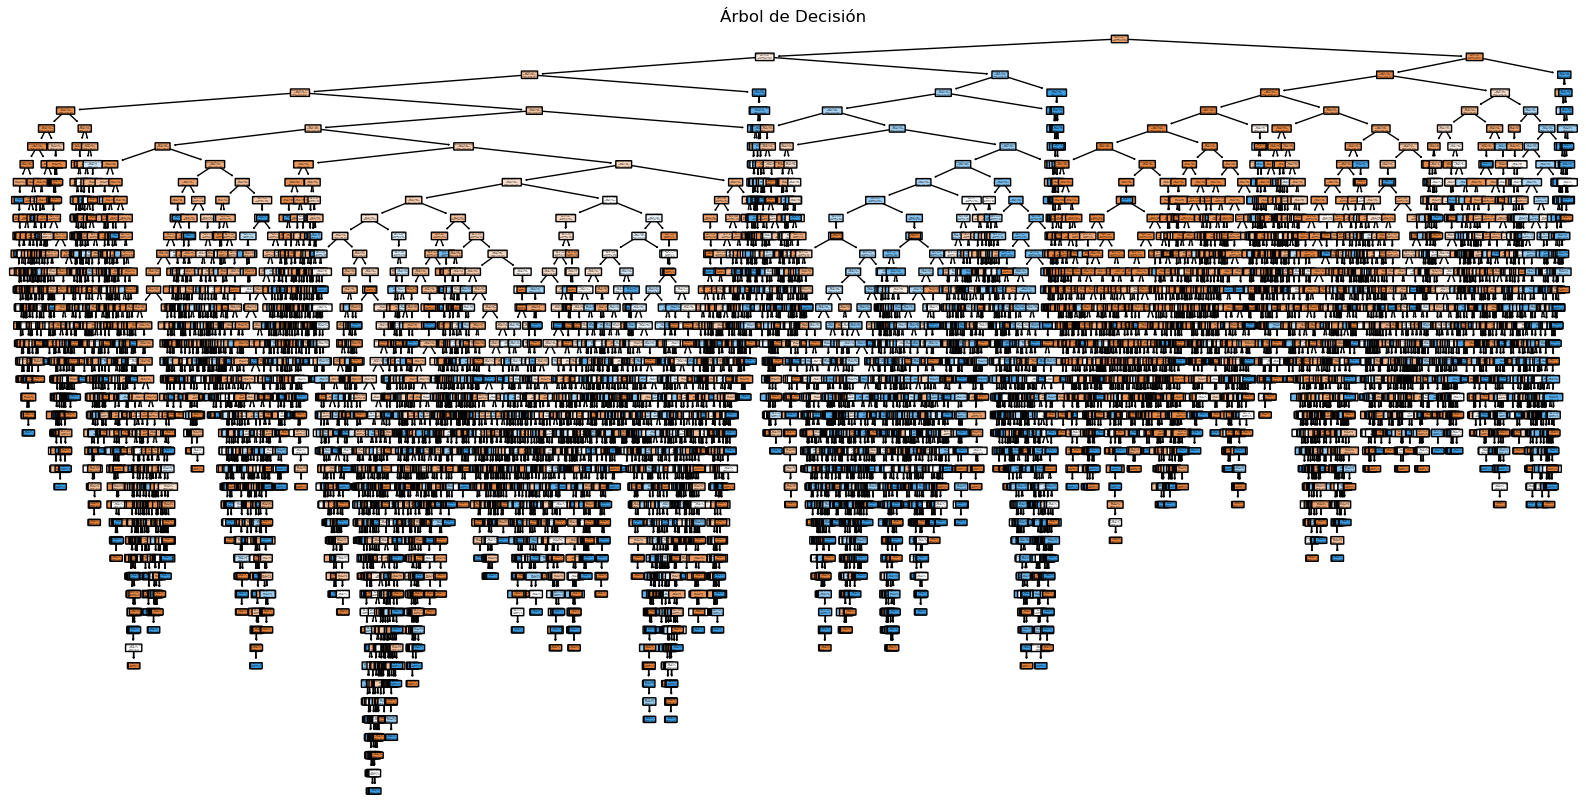

In [39]:
# Visualizar el árbol de decisión
plt.figure(figsize=(20, 10))
plot_tree(dtree, feature_names=X.columns, class_names=['Clase 0', 'Clase 1'], filled=True, rounded=True)
plt.title('Árbol de Decisión')
plt.show()